In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("samples_human.csv")

In [73]:
df

,Unnamed: 0,group,home,workplace,school,hospital,supermarket
0,0,unemployed,0.9,0.0,0.0,0.0,0.2
1,1,employed,0.3,0.5,0.0,0.0,0.6
2,2,student,0.7,0.2,0.5,0.0,0.1
3,3,unemployed,0.8,0.0,0.0,0.0,0.0
4,4,healthcare,0.1,0.0,0.0,0.9,0.0
...,...,...,...,...,...,...,...
1995,1995,healthcare,0.3,0.0,0.0,0.9,0.0
1996,1996,unemployed,0.9,0.2,0.0,0.0,0.2
1997,1997,healthcare,0.4,0.0,0.2,0.5,0.4
1998,1998,healthcare,0.2,0.0,0.0,0.9,0.1


In [74]:
convert = {"student": 1, "healthcare": 2, "employed": 3, "unemployed":4}
convertList = list()
for i in df["group"].values:
  #  print(i)
    convertList.append(convert[i])
df["groupID"] = convertList
df

,Unnamed: 0,group,home,workplace,school,hospital,supermarket,groupID
0,0,unemployed,0.9,0.0,0.0,0.0,0.2,4
1,1,employed,0.3,0.5,0.0,0.0,0.6,3
2,2,student,0.7,0.2,0.5,0.0,0.1,1
3,3,unemployed,0.8,0.0,0.0,0.0,0.0,4
4,4,healthcare,0.1,0.0,0.0,0.9,0.0,2
...,...,...,...,...,...,...,...,...
1995,1995,healthcare,0.3,0.0,0.0,0.9,0.0,2
1996,1996,unemployed,0.9,0.2,0.0,0.0,0.2,4
1997,1997,healthcare,0.4,0.0,0.2,0.5,0.4,2
1998,1998,healthcare,0.2,0.0,0.0,0.9,0.1,2


In [75]:
y = df["groupID"]
y

0       4
1       3
2       1
3       4
4       2
       ..
1995    2
1996    4
1997    2
1998    2
1999    1
Name: groupID, Length: 2000, dtype: int64

In [76]:
x = df[["home","workplace", "school", "hospital", "supermarket"]]

In [77]:
x

,home,workplace,school,hospital,supermarket
0,0.9,0.0,0.0,0.0,0.2
1,0.3,0.5,0.0,0.0,0.6
2,0.7,0.2,0.5,0.0,0.1
3,0.8,0.0,0.0,0.0,0.0
4,0.1,0.0,0.0,0.9,0.0
...,...,...,...,...,...
1995,0.3,0.0,0.0,0.9,0.0
1996,0.9,0.2,0.0,0.0,0.2
1997,0.4,0.0,0.2,0.5,0.4
1998,0.2,0.0,0.0,0.9,0.1


In [78]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [79]:
# using feature scaling
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)

In [80]:
# training the dataset
from sklearn.tree import DecisionTreeRegressor
regrassor = DecisionTreeRegressor(random_state = 0)
regrassor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [81]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.33, random_state=42)
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
dtree_model = DecisionTreeClassifier(max_depth = 4).fit(X_train1, y_train1) 
dtree_predictions = dtree_model.predict(X_test1) 
from sklearn.metrics import classification_report
print(classification_report(dtree_predictions,y_test1))


              precision    recall  f1-score   support

           1       0.72      1.00      0.83       121
           2       1.00      1.00      1.00       157
           3       0.51      0.86      0.64       105
           4       1.00      0.56      0.72       277

    accuracy                           0.79       660
   macro avg       0.81      0.86      0.80       660
weighted avg       0.87      0.79      0.79       660



In [82]:
###Student
student_df = df.loc[df['group'] == 'student']
home_df = student_df.sort_values("home")

In [83]:
#predict home -workplace
X = home_df.iloc[:, 2:3].values
y = home_df.iloc[:, 3:4].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

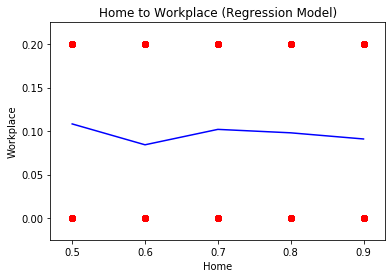

In [84]:
#y_pred = regressor.predict(X)
#5 Visualising the Decision Tree Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Home to Workplace (Regression Model)')
plt.xlabel('Home')
plt.ylabel('Workplace')
plt.show()

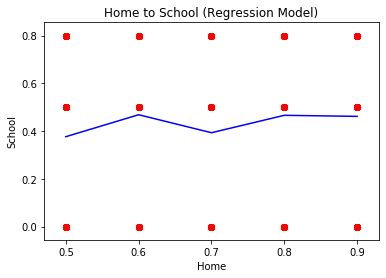

In [85]:
#predict home -school
X = home_df.iloc[:, 2:3].values
y1 = home_df.iloc[:, 4:5].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor1 = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor1.fit(X,y1)
#y_pred = regressor.predict(X)
#5 Visualising the Decision Tree Regression results
plt.scatter(X, y1, color = 'red')
plt.plot(X, regressor1.predict(X), color = 'blue')
plt.title('Home to School (Regression Model)')
plt.xlabel('Home')
plt.ylabel('School')
plt.show()

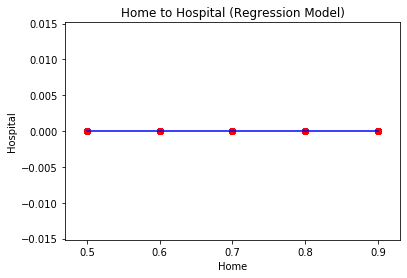

In [86]:
#predict home - hospital
X = home_df.iloc[:, 2:3].values
y2 = home_df.iloc[:, 5:6].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor2 = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor2.fit(X,y2)
#y_pred = regressor.predict(X)
#5 Visualising the Decision Tree Regression results
plt.scatter(X, y2, color = 'red')
plt.plot(X, regressor2.predict(X), color = 'blue')
plt.title('Home to Hospital (Regression Model)')
plt.xlabel('Home')
plt.ylabel('Hospital')
plt.show()

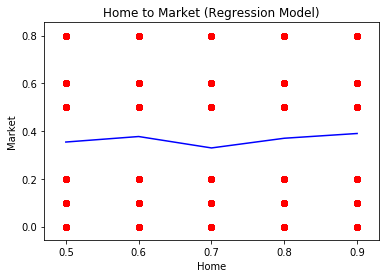

In [87]:
#predict home - supermarket
X = home_df.iloc[:, 2:3].values
y3 = home_df.iloc[:, 6:7].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor3 = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor3.fit(X,y3)
#y_pred = regressor.predict(X)
#5 Visualising the Decision Tree Regression results
plt.scatter(X, y3, color = 'red')
plt.plot(X, regressor3.predict(X), color = 'blue')
plt.title('Home to Market (Regression Model)')
plt.xlabel('Home')
plt.ylabel('Market')
plt.show()

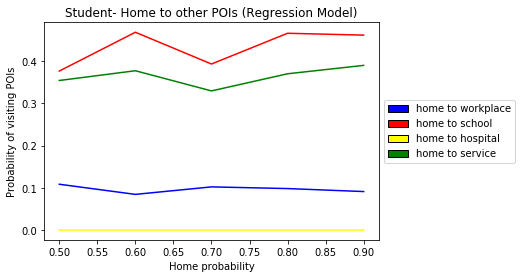

In [88]:
from matplotlib.patches import Rectangle
plt.plot(X, regressor.predict(X), color = 'blue')
plt.plot(X, regressor1.predict(X), color = 'red')
plt.plot(X, regressor2.predict(X), color = 'yellow')
plt.plot(X, regressor3.predict(X), color = 'green')
plt.title('Student- Home to other POIs (Regression Model)')
plt.xlabel('Home probability')
plt.ylabel('Probability of visiting POIs')
colors = ['blue', 'red', 'yellow', 'green']


handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["home to workplace", "home to school", "home to hospital", "home to service"]
plt.legend(handles, labels, loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [89]:
### Starting from workplace

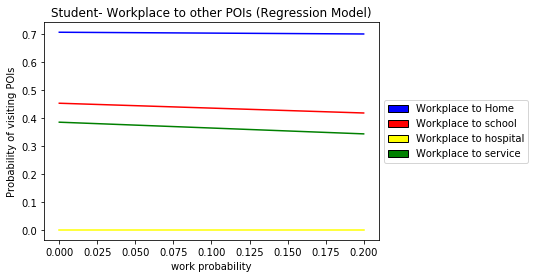

In [90]:
#work-home
work_df = student_df.sort_values("workplace")
X1 = work_df.iloc[:, 3:4].values
y = work_df.iloc[:, 2:3].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X1,y)
#work-school
y1 = work_df.iloc[:, 4:5].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor1 = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor1.fit(X1,y1)
#work-hospital
y2 = work_df.iloc[:, 5:6].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor2 = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor2.fit(X1,y2)
#work-market
y3 = work_df.iloc[:, 6:7].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor3 = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor3.fit(X1,y3)
#y_pred = regressor.p

plt.plot(X1, regressor.predict(X1), color = 'blue')
plt.plot(X1, regressor1.predict(X1), color = 'red')
plt.plot(X1, regressor2.predict(X1), color = 'yellow')
plt.plot(X1, regressor3.predict(X1), color = 'green')
plt.title('Student- Workplace to other POIs (Regression Model)')
plt.xlabel('work probability')
plt.ylabel('Probability of visiting POIs')
colors = ['blue', 'red', 'yellow', 'green']


handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["Workplace to Home", "Workplace to school", "Workplace to hospital", "Workplace to service"]
plt.legend(handles, labels, loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

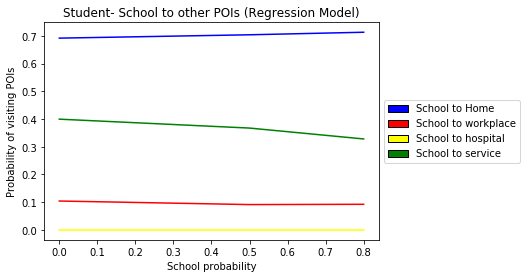

In [91]:

school_df = student_df.sort_values("school")
#school-home
X2 = school_df.iloc[:, 4:5].values
y = school_df.iloc[:, 2:3].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X2,y)
#school-work
y1 = school_df.iloc[:, 3:4].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor1 = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor1.fit(X2,y1)
#school-hospital
y2 = school_df.iloc[:, 5:6].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor2 = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor2.fit(X2,y2)
#school-market
y3 = work_df.iloc[:, 6:7].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor3 = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor3.fit(X2,y3)
#y_pred = regressor.p

plt.plot(X2, regressor.predict(X2), color = 'blue')
plt.plot(X2, regressor1.predict(X2), color = 'red')
plt.plot(X2, regressor2.predict(X2), color = 'yellow')
plt.plot(X2, regressor3.predict(X2), color = 'green')
plt.title('Student- School to other POIs (Regression Model)')
plt.xlabel('School probability')
plt.ylabel('Probability of visiting POIs')
colors = ['blue', 'red', 'yellow', 'green']


handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["School to Home", "School to workplace", "School to hospital", "School to service"]
plt.legend(handles, labels, loc="center left", bbox_to_anchor=(1, 0.5))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

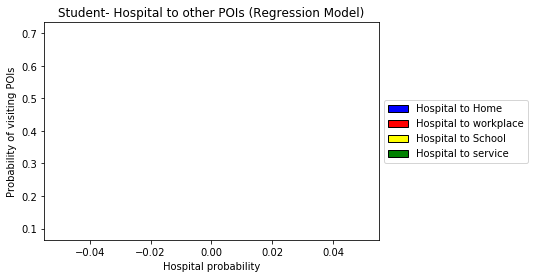

In [92]:

hosp_df = student_df.sort_values("hospital")
#school-home
X2 = hosp_df.iloc[:, 5:6].values
y = hosp_df.iloc[:, 2:3].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X2,y)
#hosp-work
y1 = hosp_df.iloc[:, 3:4].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor1 = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor1.fit(X2,y1)
#school-hospital
y2 = school_df.iloc[:, 4:5].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor2 = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor2.fit(X2,y2)
#school-market
y3 = work_df.iloc[:, 6:7].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor3 = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor3.fit(X2,y3)
#y_pred = regressor.p

plt.plot(X2, regressor.predict(X2), color = 'blue')
plt.plot(X2, regressor1.predict(X2), color = 'red')
plt.plot(X2, regressor2.predict(X2), color = 'yellow')
plt.plot(X2, regressor3.predict(X2), color = 'green')
plt.title('Student- Hospital to other POIs (Regression Model)')
plt.xlabel('Hospital probability')
plt.ylabel('Probability of visiting POIs')
colors = ['blue', 'red', 'yellow', 'green']


handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["Hospital to Home", "Hospital to workplace", "Hospital to School", "Hospital to service"]
plt.legend(handles, labels, loc="center left", bbox_to_anchor=(1, 0.5))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

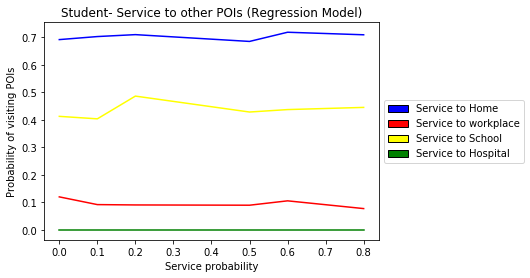

In [93]:

market_df = student_df.sort_values("supermarket")
#market-home
X2 = market_df.iloc[:, 6:7].values
y = market_df.iloc[:, 2:3].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X2,y)
#market-work
y1 = market_df.iloc[:, 3:4].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor1 = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor1.fit(X2,y1)
#market-school
y2 = market_df.iloc[:, 4:5].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor2 = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor2.fit(X2,y2)
#market-hosptial
y3 = market_df.iloc[:, 5:6].values
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor3 = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor3.fit(X2,y3)
#y_pred = regressor.p

plt.plot(X2, regressor.predict(X2), color = 'blue')
plt.plot(X2, regressor1.predict(X2), color = 'red')
plt.plot(X2, regressor2.predict(X2), color = 'yellow')
plt.plot(X2, regressor3.predict(X2), color = 'green')
plt.title('Student- Service to other POIs (Regression Model)')
plt.xlabel('Service probability')
plt.ylabel('Probability of visiting POIs')
colors = ['blue', 'red', 'yellow', 'green']


handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
labels = ["Service to Home", "Service to workplace", "Service to School", "Service to Hospital"]
plt.legend(handles, labels, loc="center left", bbox_to_anchor=(1, 0.5))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()